# <center> 👉 PT_08_1 IP » _Histogram, Normalize, Equalization and CLAHE_ </center>

## ▶ Histogram  

A histogram is a graph of a __frequency distribution table.__   
- To put it simply, it is a graph of how many things there are.    

Displaying the pixel values of an image as a histogram helps you __analyze the image__.    
- For example, count how many pixels with a pixel value of 100,  
- how many pixels with 230 pixels,   
- and how many pixels with 255 pixels in the entire image, etc.  

By doing this, you can determine the __distribution of the pixels in color and contrast.__

<img src = './images/practice_img/hist1.png' width=300 height=300>

https://www.cambridgeincolour.com/tutorials/histograms1.htm  
 

In OpenCV, a histogram can be implemented through a function called __cv2.calcHist().__

~ Syntax:
    
- **cv2.calHist(img, channel, mask, histSize, ranges)**  

~ Parameters:
    
- img: [img] list
- channel: list: 1 ch: [0], 2 ch: [0, 1], 3 ch: [0, 1, 2]
- mask: Calculate histogram only for pixels specified in the mask, None:all
- histSize: No of Bins, list: 1 ch: [256], 2 ch: [256, 256], 3 ch: [256, 256, 256]
- ranges: range of pxl, RGB: [0, 256]

~ Example:

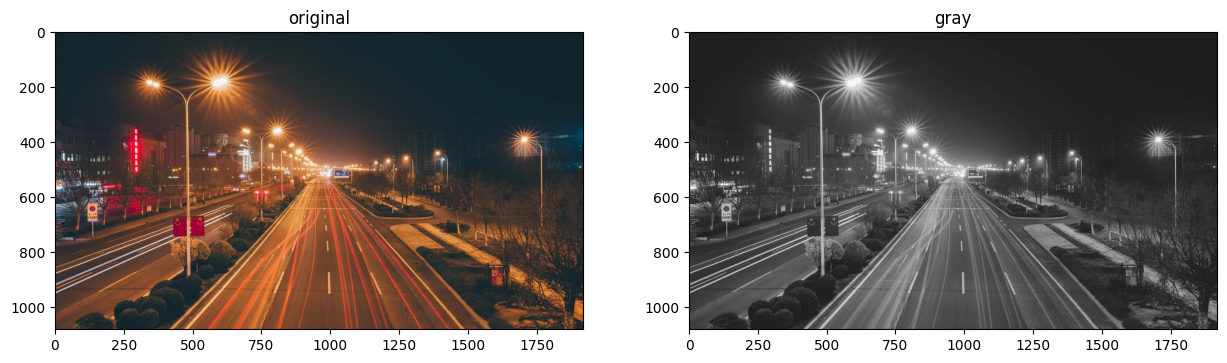

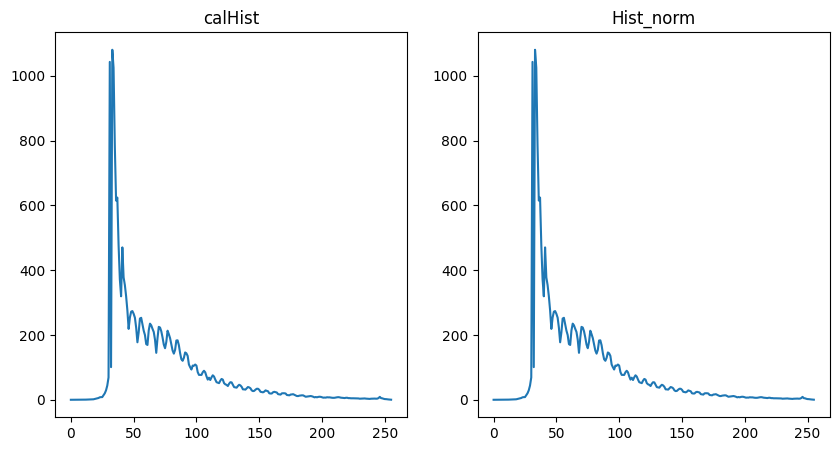

In [59]:
import cv2
import numpy as np

src = cv2.imread("./images/practice_img/road_night.webp")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
result = np.zeros((src.shape[0], 256), dtype=np.uint8)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_norm = cv2.normalize(hist, hist, 0, result.shape[0], cv2.NORM_MINMAX) 
# The minimum value is alpha (0), and the maximum value is beta (result.shape[0])

from matplotlib import pyplot as plt

plt.subplots(1, 2, figsize=(15,5))
plt.subplot(121), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), plt.title('original')
plt.subplot(122), plt.imshow(gray, cmap='gray'), plt.title('gray')
plt.show()

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121), plt.plot(hist), plt.title('calHist')
plt.subplot(122), plt.plot(hist_norm), plt.title('Hist_norm')
plt.show()

### ■ Gray : 1 ch Hist

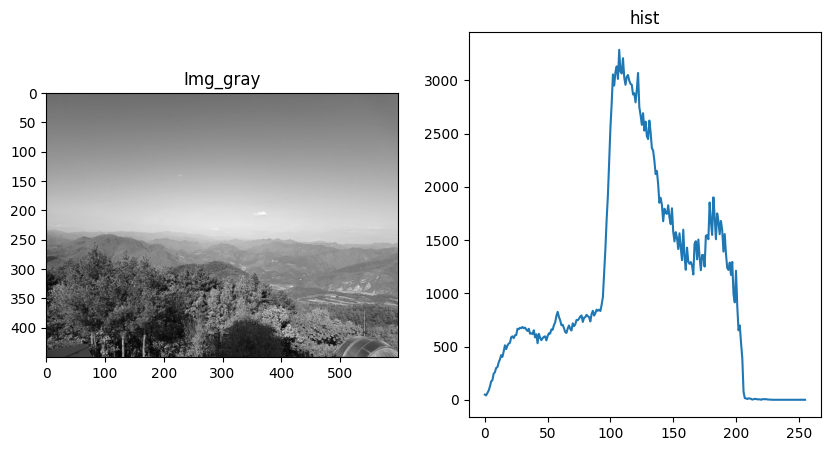

In [5]:
# Gray : 1 ch Hist (histo_gray.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/mountain.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

plt.subplots(1,2, figsize=(10,5)) # ,gridspec_kw={'height_ratios': [3]}
plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Img_gray')
plt.subplot(122),plt.plot(hist),plt.title('hist')

plt.show()

In [6]:
print("hist.shape:", hist.shape)  
print("hist.sum():", hist.sum(), "img.shape:",img.shape) 
plt.show() # 450x600=270,000

hist.shape: (256, 1)
hist.sum(): 270000.0 img.shape: (450, 600)


### ■ Color : 3 ch - RGB each color Hist

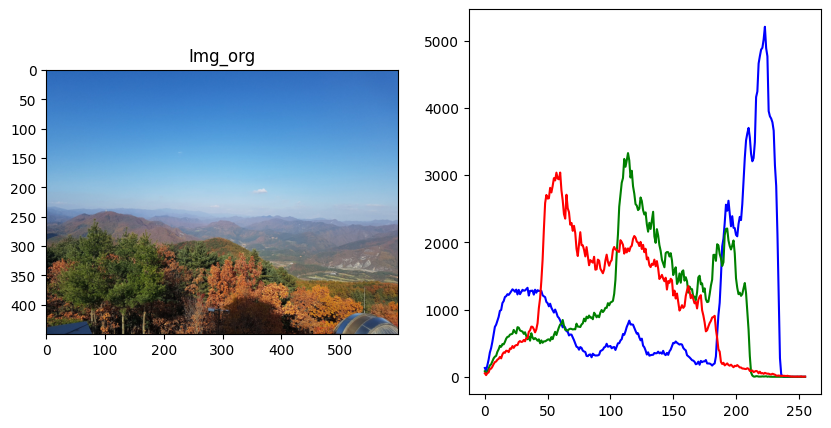

In [18]:
# Color : 1 ch - RGB each color Hist (split color) 

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/mountain.jpg')
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

plt.subplots(1,2, figsize=(10,5))
img_split = cv2.split(img)
colors = ('b', 'g', 'r')
for (img_s, color) in zip (img_split, colors):
    hist = cv2.calcHist([img_s], [0], None, [256], [0, 256])
    plt.subplot(122),plt.plot(hist, color = color)
    
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Img_org')
plt.show()    

## ▶ Normalization  

When is image normalization needed?:
- __Improved image quality__ when concentrated in a specific area
- When __calculating between different images__,
- When the image needs to be converted under the __same conditions__

        언제 이미지 정규화가 필요한가?:    
        - 특정 영역에 몰려 있는 경우 화질을 개선  
        - 서로 다른 이미지 간의 연산시, 
        - 이미지를 같은 조건으로 변환 필요시 

OpenCV : __cv2.normalize()__

~ Syntax:
    
- **cv2.normalize(img, channel, mask, histSize, ranges)**  

~ Parameters: same as cv2.calcHist()

~ Example: This is an example of __improving image quality__ by normalizing a blurry image..

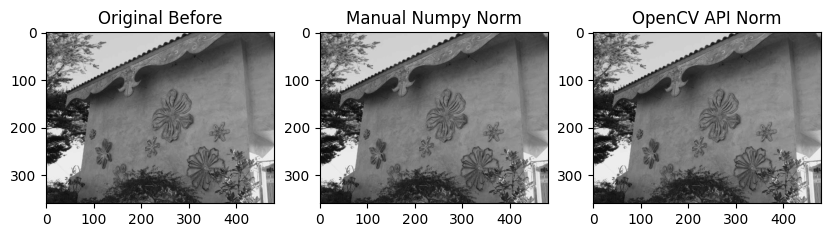

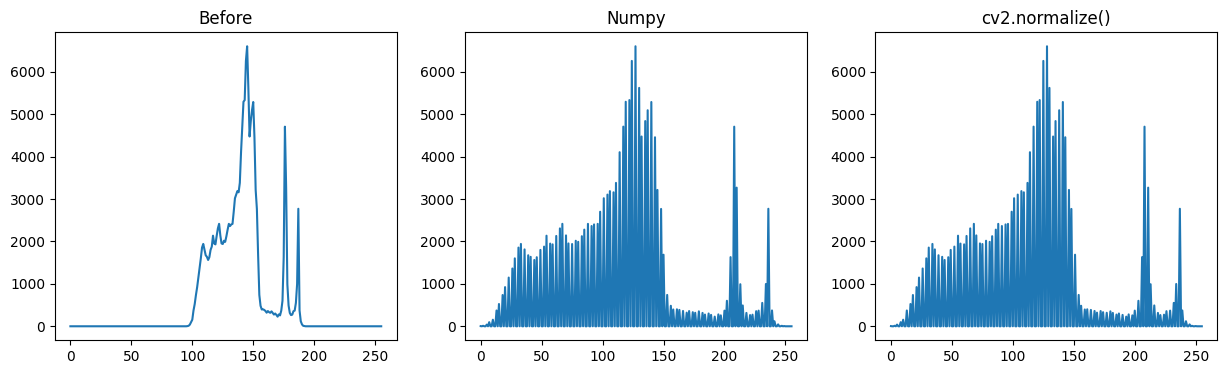

In [38]:
# improving image quality (histo_normalize.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

img_f = img.astype(np.float32)
img_norm1 = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm1 = img_norm1.astype(np.uint8)

img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm1 = cv2.calcHist([img_norm1], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

cv2.imshow('Before', img)
cv2.imshow('Manual_Numpy', img_norm1)
cv2.imshow('OpenCV cv2.normalize()', img_norm2)
cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=(10,10))
plt.subplot(131).imshow(img,cmap='gray'), plt.title('Original Before')
plt.subplot(132).imshow(img_norm1,cmap='gray'), plt.title('Manual Numpy Norm')
plt.subplot(133).imshow(img_norm2,cmap='gray'), plt.title('OpenCV API Norm')
plt.show()

from matplotlib.pyplot import figure
hists = {'Before' : hist, 'Numpy':hist_norm1, 'cv2.normalize()':hist_norm2}
figure(figsize=(15, 4))
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

Before normalization, pixel values are clustered in the center.   
However, when normalization is applied, you can see that __the pixel values are spread evenly across the board, and the image quality is improved.__  

## ▶ Equalization   

The normalization described above is effective when the __distribution is concentrated in one place__,   
but it is __not effective when there are values that are far from that concentrated area.__
In these cases, Equalization is necessary.

__Equalization is effective in improving contrast by redistributing the distribution according to the proportion of each value in the overall distribution.__  
- If the histogram of an image is too concentrated in a specific area, the image cannot be considered a good image due to low contrast.
- It can be said to be a good image when it is evenly distributed over the entire area.  

        위에서 설명한 정규화는 분포가 한곳에 집중되어 있는 경우에는 효과적이지만 그 집중된 영역에서 멀리 떨어진 값이 있을 경우에는 효과가 없습니다.  
        이런 경우 평탄화가 필요합니다.   
        평탄화는 각각의 값이 전체 분포에 차지하는 비중에 따라 분포를 재분배하므로 명암 대비를 개선하는 데 효과적입니다. 
        - 이미지의 히스토그램이 특정 영역에 너무 집중되어 있으면 명암 대비가 낮아 좋은 이미지라고 할 수 없습니다.   
        - 전체 영역에 골고루 분포가 되어 있을 때 좋은 이미지라고 할 수 있습니다. 

<img src = './images/practice_img/equal1.png' width=300 height=300>

OpenCV : 

- **dst = cv2.equalizeHist(src, dst)**

~ Example: Improved overall dark image by flattening it

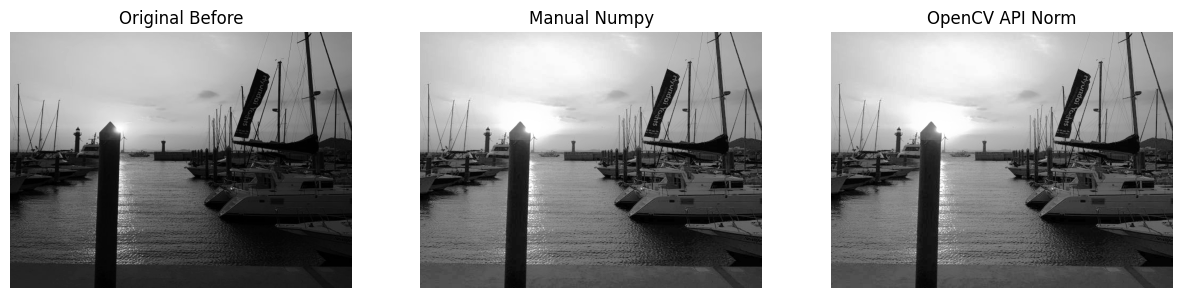

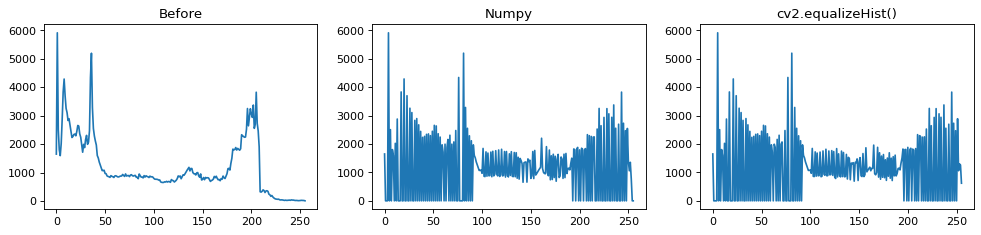

In [39]:
# histo_equalize.py

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

hist = cv2.calcHist([img], [0], None, [256], [0, 256]) 
cdf = hist.cumsum()                                     
cdf_m = np.ma.masked_equal(cdf, 0)                      # Remove 0 (zero) values as NaN
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255      # Equalize histogram calculation
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN back to 0
# print(cdf.shape)
img2 = cdf[img]                                         # Mapping histograms to pixels

img3 = cv2.equalizeHist(img)    # opencv api

hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1,3,figsize=(15,10))
axs[0].imshow(img,cmap='gray'), axs[0].axis('off'), axs[0].set_title('Original Before')
axs[1].imshow(img2,cmap='gray'), axs[1].axis('off'), axs[1].set_title('Manual Numpy')
axs[2].imshow(img3,cmap='gray'), axs[2].axis('off'), axs[2].set_title('OpenCV API Norm')

plt.show()

from matplotlib.pyplot import figure

figure(figsize=(15, 3), dpi=80)

hists = {'Before':hist, 'Numpy':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

As you can see the results, the image quality of dockside images with low contrast has improved.

### ● Histogram equalization (Color Img)

Histogram equalization can also be applied to color images.
- To improve brightness values, all three BGR channels must be flattened.
- However, when using YUV or HSV, only one brightness channel needs to be adjusted.  

        히스토그램 평탄화는 색상 이미지에도 적용할 수 있습니다.   
        밝기 값을 개선하기 위해서는 BGR 3개 채널을 모두 평탄화해야 합니다.   
        하지만 YUV나 HSV를 활용하면 하나의 밝기 채널만 조절하면 됩니다. 
        
>- HSV : v value (2nd ch)
>- YUV : y value (0th ch)

HSV :
- H: color (0 ~ 180)
- S: saturation (0 ~ 256)
- V: brightness (0 ~ 256)   

YUV or YCbCr (0 ~ 255) :
- Y: Luma (brightness)   
- U: Brightness and color difference from blue (밝기와 파란색과의 색상 차, Chroma Blue, Cb)   
- V: Brightness and color difference from red (밝기와 빨간색과의 색상 차, Chroma Red, Cr)

### ■ Histogram equalization with HSV

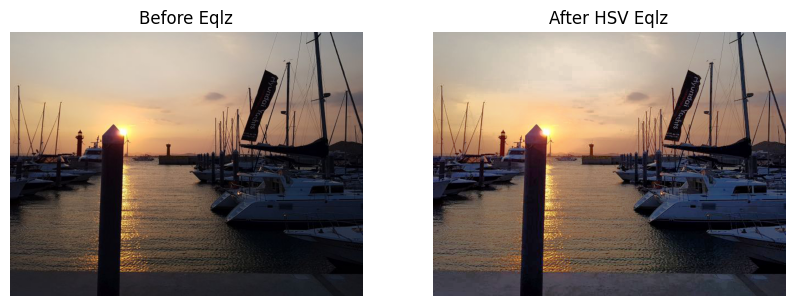

In [46]:
# histo_equalize_hsv.py

import numpy as np, cv2

img = cv2.imread('./images/practice_img/yate.jpg') 

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2]) 
img2 = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR) 
img_h = img2.copy()

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Before Eqlz')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('After HSV Eqlz')

plt.show()

### ■ Histogram equalization with YUV

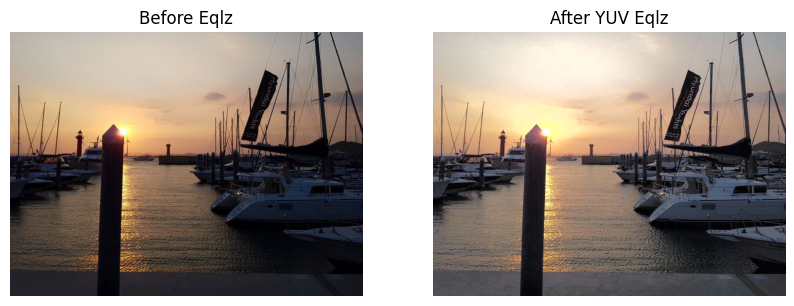

In [47]:
# histo_equalize_yuv.py

import numpy as np, cv2

img = cv2.imread('./images/practice_img/yate.jpg') 

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 
img_y = img2.copy()
cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Before Eqlz')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('After YUV Eqlz')

plt.show()

It is clearer after equalization (image on the right) than before (image on the left).   
If you look at the yacht part, you can see that the brightness has been further improved, which has improved the image quality.

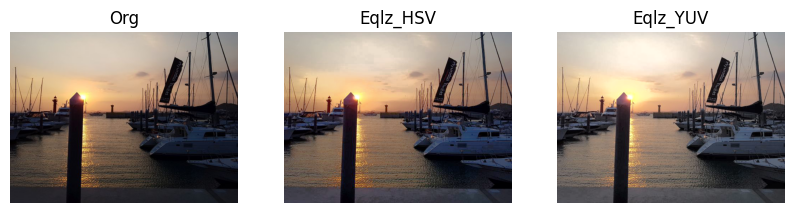

In [48]:
fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Org')
axs[1].imshow(cv2.cvtColor(img_h, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Eqlz_HSV')
axs[2].imshow(cv2.cvtColor(img_y, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('Eqlz_YUV')

plt.show()

If you need to __pay more attention to brightness__, __using the YUV method is a more effective__ method than the BGR/HSV method.  

밝기에 좀 더 신경을 써야 한다면 BGR 방식보다 YUV 방식을 사용하는 것이 더 효과적인 방법임

## ▶ CLAHE (Contrast Limited Adaptive Histogram Equalization)  

So far, we have looked at increasing the sharpness of images by improving contrast through flattening.
However, __flattening causes the bright parts of the image to be blown out.__
Look at the image below.  

지금까지 평탄화를 통해 명암 대비를 개선하여 이미지의 선명도를 높이는 작업에 대해 알아봤습니다.   
하지만 평탄화를 하면 이미지의 밝은 부분이 날아가는 현상이 발생합니다.   
아래의 이미지를 보겠습니다.

<img src = './images/practice_img/clahe1.png' width=500 height=500>

When flattening was applied, the statue's face became __so bright that its edges became unrecognizable.__
This often happens when flattening is __applied to the entire image.__

To prevent this phenomenon, flattening is applied by dividing the image into certain areas (tileGridSize parameter in the code below).
- But there are problems with this approach too.   
- If there are extremely dark or bright areas within a certain area, noise will occur and the desired results will not be obtained.

To avoid this problem, if any area __exceeds the specified limit value (clipLimit parameter in the code below), the pixels are distributed evenly to other areas.__  
__This flattening method is called CLAHE.__  

        평탄화를 적용하니 조각상의 얼굴이 너무 밝게 바뀌어 경계선을 알아볼 수 없게 되었습니다.   
        평탄화를 이미지 전체에 적용하면 이런 현상이 자주 발생합니다.   
        이런 현상을 막기 위해 이미지를 일정한 영역(아래 코드에서 tileGridSize 파라미터)으로 나누어 평탄화를 적용합니다.   
        그러나 이 방식에도 문제가 있습니다. 일정한 영역 내에서 극단적으로 어둡거나 밝은 부분이 있으면 노이즈가 생겨 원하는 결과를 얻을 수 없게 됩니다.   
        이 문제를 피하기 위해서 어떤 영역이든 지정된 제한 값(아래 코드에서 clipLimit 파라미터)을 넘으면 그 픽셀은 다른 영역에 균일하게 배분하여 적용합니다.   
        이러한 평탄화 방식을 CLAHE라고 합니다.

<img src = './images/practice_img/clahe2.png' width=400 height=400>

~ Syntax:
    
- **clahe = cv2.createCLAHE(clipLimit, tileGridSize)**  

~ Parameters:  
    
- clipLimit: Contrast limit boundary value, default=40.0
- tileGridSize: size of area, default=8 x 8
- clahe: CLAHE object
- clahe.apply(src): apply CLAHE 

~ Example: 

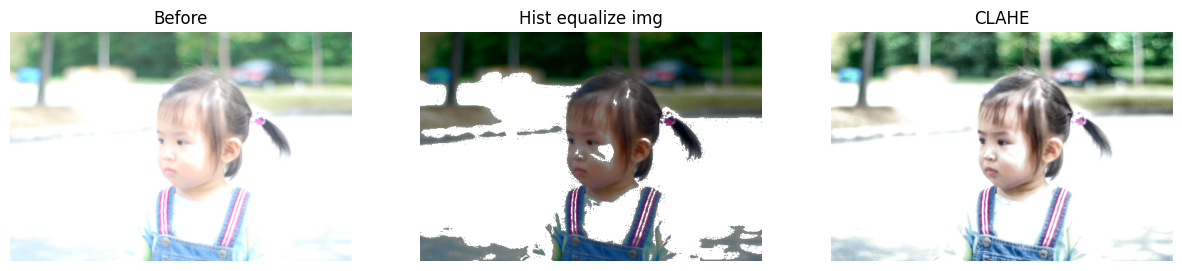

In [49]:
# CLAHE (histo_clahe.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) # create CLAHE 
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           # apply CLAHE 
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('Hist equalize img', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1,3,figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Before')
axs[1].imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Hist equalize img')
axs[2].imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('CLAHE')

plt.show()

The left is the original photo, the middle is flattened, and the right is the result of applying CLAHE.
- When flattening is applied, bright parts appear blown out.
- However, this phenomenon was improved when CLAHE was applied.  

        왼쪽이 원본 사진, 가운데가 평탄화, 오른쪽이 CLAHE를 적용한 결과입니다.   
        - 평탄화를 적용할 땐 밝은 부분은 날아가는 현상이 발생  
        - 하지만 CLAHE를 적용할 땐 이러한 현상이 개선되었습니다.